In [1]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import palettable

from astropy.table import Table
import astropy.units as u
import astropy.coordinates as coords

In [2]:
from scipy import stats

Using 2D normal as an example

## Rejection sample in 2-D

In [3]:

Nwant = 10000
Nhave = 0
sample = []

for i in range(200):
    xy = np.random.uniform(low=-5, high=5, size=[10000,2])
    z = np.random.uniform(size=10000)
    mean, cov = [0, 0], np.eye(2)
    keep = z<stats.multivariate_normal.pdf(xy, mean, cov)
    Nhave += keep.sum()
    sample.append(xy[keep])
    if Nhave > Nwant:
        print(i)
        break

xy = np.vstack(sample)[:Nwant, :]

101


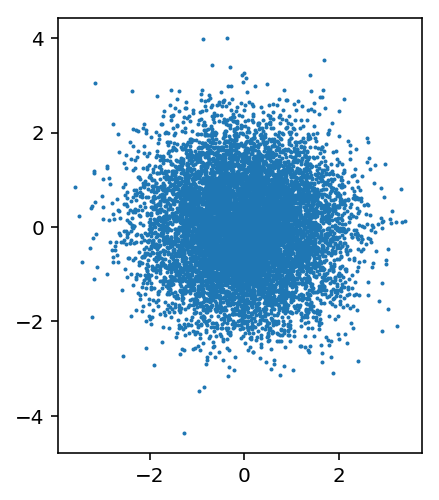

In [4]:
plt.axes(aspect='equal')
plt.scatter(xy[:,0], xy[:,1], s=1)

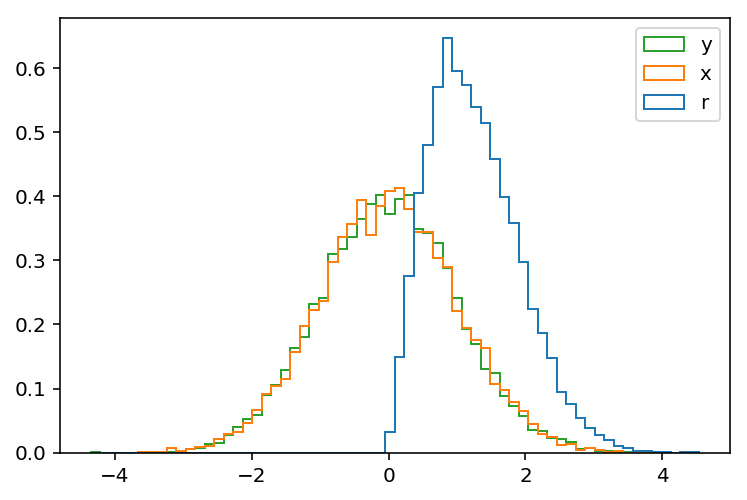

In [5]:
r = np.hypot(xy[:,0], xy[:,1])
plt.hist([r, xy[:,0], xy[:,1]], normed=True, histtype='step', bins=64,
          label=['r', 'x', 'y']);
plt.legend();

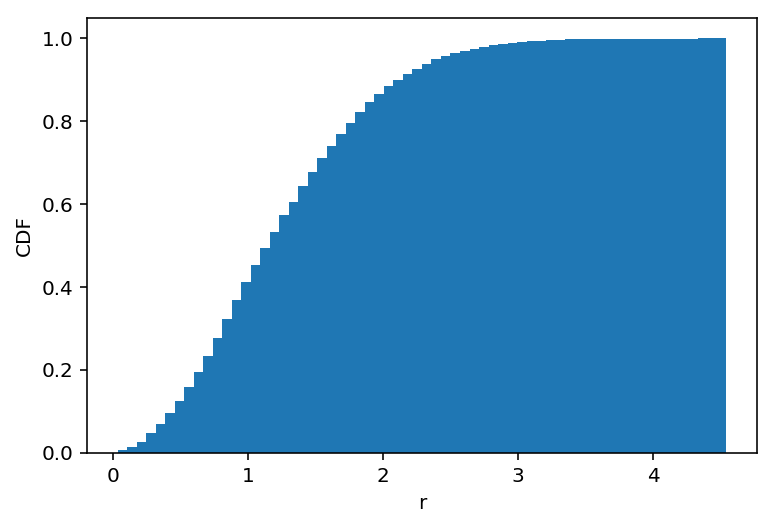

In [6]:
plt.hist(r, normed=True, cumulative=True, bins=64);
plt.xlabel('r')
plt.ylabel('CDF')

In [7]:
from scipy.integrate import quad

## Sample in $r$ first

To inverse transform sample in $r$ fisrt, we want the CDF in $r$.
But note that $rdrd\phi = dxdy$! So CDF of $r$ is

$$ CDF(r) = \int P(r) r dr \, 2\pi$$

Since $P(r) \propto \exp{-r^2/2}$ and $d(r^2)/dr = r$, this integral can be simplified analytically, but I'm lazy so I get normalization constant numerically.

In [8]:
def integrand(r):
    return r * stats.norm.pdf(r)  # because 2pi doesn't matter

def rcdf(r):
    return quad(integrand, 0, r)[0]

In [9]:
normalization = rcdf(10)

In [10]:
def rcdf_normed(r):
    return rcdf(r)/normalization

See that it matches $r$ distribution from 2D rejection sampling.

In [11]:
rs = np.linspace(0, 5, 100)
cdfs = np.array(list(map(rcdf_normed, rs)))

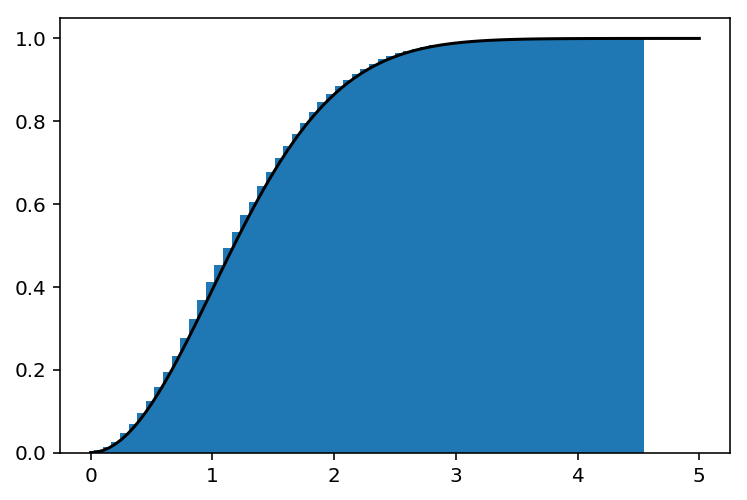

In [12]:
plt.plot(rs, cdfs, 'k-')
v, bins, _ = plt.hist(r, normed=True, cumulative=True, bins=64)

Now do inverse transform sampling in $r$ first.

In [13]:
z = np.random.uniform(size=10000)
r2 = np.interp(z, cdfs, rs)

They match as they should.

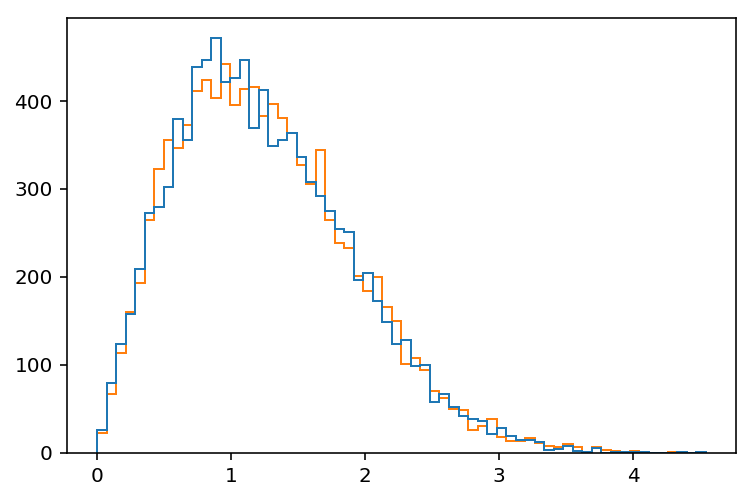

In [14]:
plt.hist([r,r2], bins=64, histtype='step');

For $x$, $y$, we random sample angle $\phi$.

In [15]:
phi = np.random.uniform(0, np.pi*2, size=10000)

x2, y2 = r2*np.cos(phi), r2*np.sin(phi)

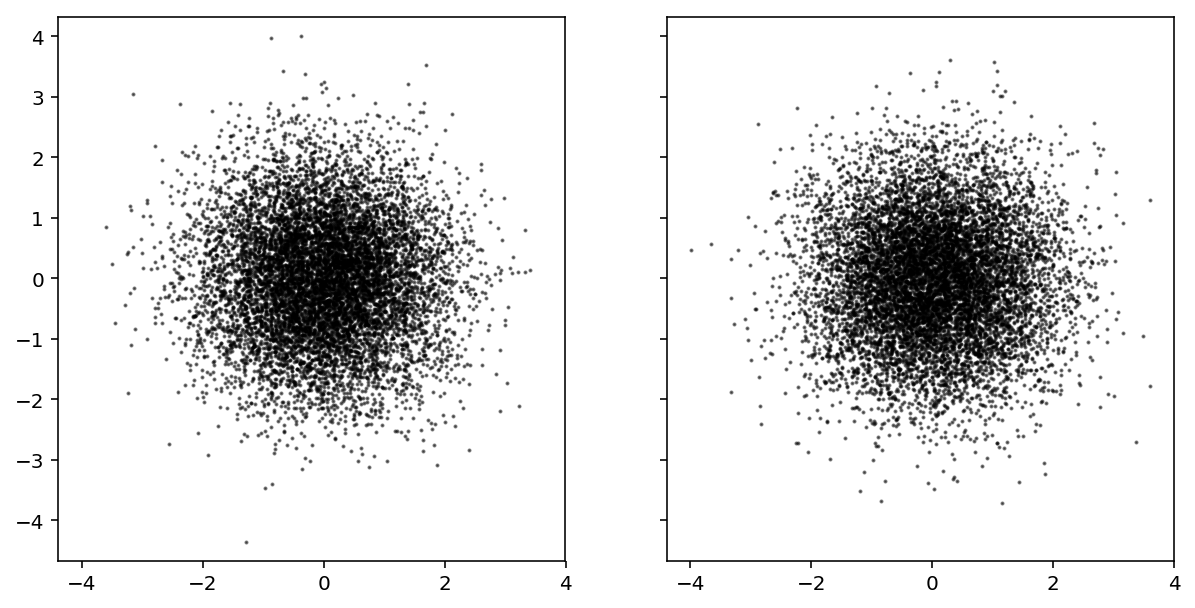

In [19]:
fig, ax = plt.subplots(1,2, figsize=(10,5), sharex=True, sharey=True)
ax[0].set_aspect('equal')
ax[1].set_aspect('equal')
ax[0].scatter(*xy.T, s=1, c='k', alpha=.5)
ax[1].scatter(x2,y2, s=1, c='k', alpha=.5)

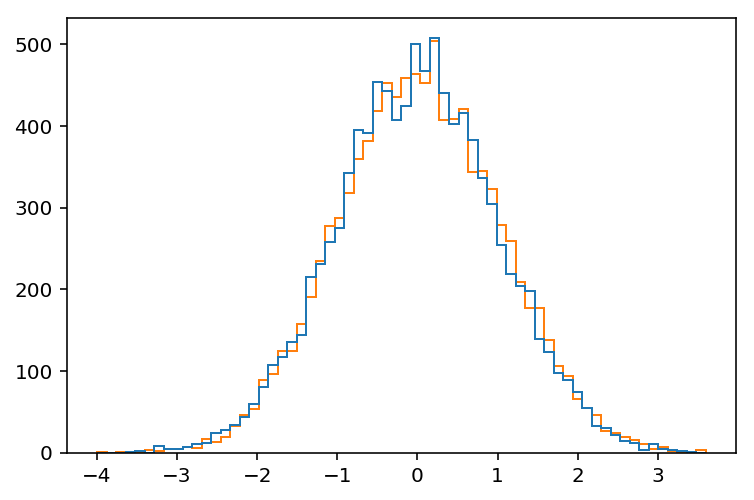

In [17]:
plt.hist([xy[:,0], x2], bins=64, histtype='step');

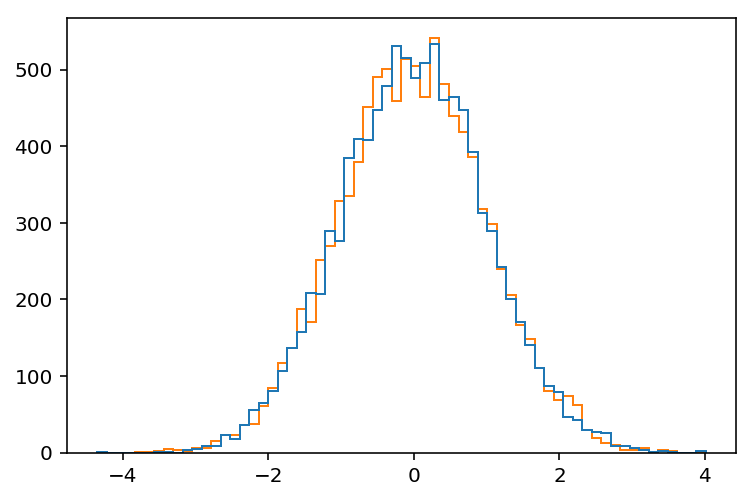

In [18]:
plt.hist([xy[:,1], y2], bins=64, histtype='step');